In [1]:
import sys
import os
sys.path.insert(2, '/global/project/projectdirs/lux/Tools/root_pdsf/root/bin')
sys.path.insert(2, '/global/project/projectdirs/lux/Tools/root_pdsf/root/lib')
from ROOT import TCanvas, TPad, TFile, TPaveText, TChain, TCut, TF1, TH1F, TLine,TLegend
from ROOT import gBenchmark, gStyle, gROOT

In [2]:
chain5 = TChain('golden')
chain5.Add('/project/projectdirs/lux/data/golden/Golden_CH3T_*.root')

chain4 = TChain('golden')
chain4.Add('/project/projectdirs/lux/data/golden/Golden_DD_*.root')

chain3 = TChain('golden')
chain3.Add('/project/projectdirs/lux/data/golden/Golden_Cs137_Aug.root')

chain2 = TChain('golden')
chain2.Add('/project/projectdirs/lux/users/acurrie/Run3_DP2.0/*.root')

chain = TChain('golden')
chain.Add('/project/projectdirs/lux/data/golden/Golden_XeAct/*.root')

3

In [1]:
import rootnotes_nersc
from rootnotes_nersc import show, clearCanvas
from numpy import *
import scipy
import pylab
from dateutil import parser
from matplotlib import pyplot as plt
import matplotlib.dates as md
import scipy.io as sio

import sys
sys.path.insert(2, '//global/project/projectdirs/lux/data')
import aLib

In [4]:
from matplotlib import pyplot as plt
%pylab inline  
#always do this for plotting...  don't ask why
#now set the size of figures to display in window
pylab.rcParams['figure.figsize'] = (10, 8) # set size of figures

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
g1=0.1167
g2=12.05

g1DD=g1*0.982
g2DD=g2*0.954

g1_D=0.116
g2_D=0.473*24.66

<h1> Make a cut around 24 hours of each Kr83 calibration </h1>

In [6]:
Kr_files=array([['lux10_20130422T2031'],
       ['lux10_20130424T1406'],
       ['lux10_20130424T1740'],
       ['lux10_20130425T1047'],
       ['lux10_20130426T0951'],
       ['lux10_20130426T1019'],
       ['lux10_20130429T1433'],
       ['lux10_20130429T1447'],
       ['lux10_20130501T1508'],
       ['lux10_20130503T1457'],
       ['lux10_20130506T1328'],
       ['lux10_20130510T1250'],
       ['lux10_20130510T1607'],
       ['lux10_20130510T2008'],
       ['lux10_20130511T0014'],
       ['lux10_20130513T1438'],
       ['lux10_20130517T1508'],
       ['lux10_20130517T1542'],
       ['lux10_20130517T1810'],
       ['lux10_20130520T1444'],
       ['lux10_20130520T1504'],
       ['lux10_20130520T1742'],
       ['lux10_20130520T1758'],
       ['lux10_20130520T1909'],
       ['lux10_20130524T1503'],
       ['lux10_20130524T1537'],
       ['lux10_20130524T1829'],
       ['lux10_20130528T1304'],
       ['lux10_20130528T1546'],
       ['lux10_20130529T1517'],
       ['lux10_20130529T1547'],
       ['lux10_20130529T2003'],
       ['lux10_20130531T1403'],
       ['lux10_20130531T1421'],
       ['lux10_20130604T1421'],
       ['lux10_20130604T1737'],
       ['lux10_20130604T2137'],
       ['lux10_20130604T2334'],
       ['lux10_20130607T1512'],
       ['lux10_20130610T1518'],
       ['lux10_20130614T1623'],
       ['lux10_20130617T1457'],
       ['lux10_20130621T1533'],
       ['lux10_20130626T1028'],
       ['lux10_20130626T1517'],
       ['lux10_20130628T1444'],
       ['lux10_20130701T1451'],
       ['lux10_20130701T1646'],
       ['lux10_20130701T2257'],
       ['lux10_20130705T1530'],
       ['lux10_20130709T1009'],
       ['lux10_20130709T1811'],
       ['lux10_20130712T1427'],
       ['lux10_20130712T2232'],
       ['lux10_20130717T1424'],
       ['lux10_20130717T2212'],
       ['lux10_20130720T1045'],
       ['lux10_20130720T1908'],
       ['lux10_20130723T1452'],
       ['lux10_20130723T2205'],
       ['lux10_20130726T1224'],
       ['lux10_20130726T1431'],
       ['lux10_20130726T1819'],
       ['lux10_20130727T0000'],
       ['lux10_20130729T1004'],
       ['lux10_20130729T1752'],
       ['lux10_20130729T2337'],
       ['lux10_20130807T1035'],
       ['lux10_20130807T1403'],
       ['lux10_20130807T2233'],
       ['lux10_20130812T1530'],
       ['lux10_20130812T1546'],
       ['lux10_20130812T2259'],
       ['lux10_20130813T0652'],
       ['lux10_20130823T0953'],
       ['lux10_20130823T1717'],
       ['lux10_20130823T2119'],
       ['lux10_20130829T1005']
               ])

In [7]:
Kr_file_dates=[]
for ii in range(0,Kr_files.size):
    Kr_file_dates.append(parser.parse(Kr_files[ii,0][6:]))

Kr_file_dates=array(Kr_file_dates)

In [8]:
lux_epoch=md.datestr2num('Jan 1st 2011 at 00:00')
Kr_lux_stamps=(md.date2num(Kr_file_dates)-lux_epoch)*24*3600*10**8

In [96]:
start_delay=0*3600*10**8
end_delay=24*3600*10**8
kr_time_cut_all=TCut('')

for ii in range(0,Kr_lux_stamps.size):
    kr_time_cut=TCut('!(luxstamp>{:.0f} && luxstamp<{:.0f})'.format(Kr_lux_stamps[ii]-start_delay,Kr_lux_stamps[ii]+end_delay))
    if ii==0:
        kr_time_cut_all=TCut(kr_time_cut.GetTitle());
    else:
        kr_time_cut_all=kr_time_cut_all+kr_time_cut
        #kr_time_cut_all=TCut(kr_time_cut_all.GetTitle() || kr_time_cut.GetTitle());

<h1> Get the livetime for each file in golden Run03</h1>

In [10]:
data=sio.loadmat('Run03Golden.mat')
GoldenDays=data['fuckthis'][:,0][0]
Golden_Livetime=data['fuckthis'][:,1][0]

GoldenFile_dates=[]
for ii in range(0,GoldenDays.size):
    GoldenFile_dates.append(parser.parse(GoldenDays[ii][6:]))

GoldenFile_dates=array(GoldenFile_dates)

lux_epoch=md.datestr2num('Jan 1st 2011 at 00:00')
Run03Golden_lux_stamps=(md.date2num(GoldenFile_dates)-lux_epoch)*24*3600*10**8

<h1> Make a histogram of the WS and Cs137 Energy </h1>

In [11]:
c2 = rootnotes.default_canvas(name='icanvas4', size=(800, 600))

In [253]:
fid_vol=TCut('drift>35 && drift<308 && correctedRadius<22')
area_cut=TCut('s1area>0 && s1area<10**5 && s2area_raw>150 && s2area>100 && s2area<10**6')
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
exclusion_cut=TCut('partner==0 && excluded==0 ')
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() + '&&' + exclusion_cut.GetTitle() );

density_plt_hst=TH1F('density_plt_hst','WS;E_com',40,0,10)
density_plt_hst2=TH1F('density_plt_hst2','Aug-Cs;E_com',200,0,1000)
density_plt_hst2.SetLineColor(2)
density_plt_hst2.SetOption("E")
n=chain2.Draw('1/73*(s1area/{:g}+s2area/{:g})>>density_plt_hst'.format(g1,g2),combined_cut+kr_time_cut_all) # WS is chain2
#n2=chain3.Draw('1/73*(s1area/{:g}+s2area/{:g})>>density_plt_hst2'.format(g1,g2),combined_cut,"same") # Cs is chain3

#s2_rec_cor # the s2 saturation corrected variable

#density_plt_hst.Scale(1./5)
#density_plt_hst_2=TH1F('density_plt_hst_2','Current Doke;E_com',300,0,1000)
#chain.Draw('1/73*(s1area/{:g}+s2area/{:g})>>density_plt_hst_2'.format(g1_D,g2_D),combined_cut)

#Or just run this without setting up the histogram first
#n=chain.Draw('1/73*(s1area/{:g}+s2area/{:g})>>density_plt_hst5,(300,0,1000)'.format(g1,g2),fid_vol+area_cut+bad_area_cut)

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst2 (Potential memory leak).


In [254]:
aline=[]
Energies=[1.5, 2.8, 5.2,33.2,41.55,163,207,236.8,410,609,661.6] 
#Energies=[661.6,969,1173,1311,1461,2204.21,2614.53] 
# Cs, Ac228, Co60,Co60,40K, Bi214,TL208
for ii, En in enumerate(Energies):
    aline.append(TLine(En,0,En,1e5))
    aline[ii].SetLineStyle(2)
    aline[ii].SetLineColor(1) #black =1
    aline[ii].Draw()

In [255]:
Leg=TLegend(.7, .6,.9,.72)
Leg.AddEntry(density_plt_hst,'WSdata','l')
Leg.AddEntry(density_plt_hst2,'Cs-Aug','l')
Leg.SetBorderSize(0) 
Leg.SetFillStyle(0)
Leg.Draw()

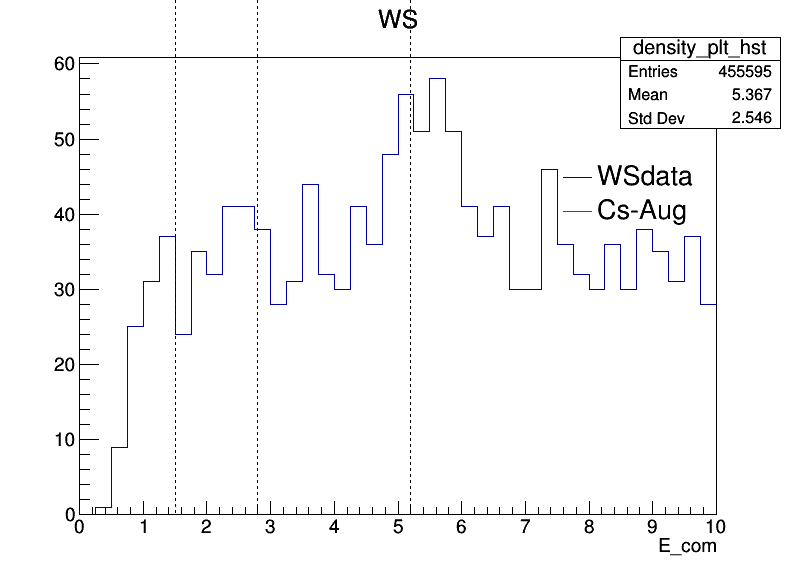

In [256]:
c2.SetLogy(0)
shoq(c2)

<h1> Histogram the LUXSTAMPS </h1>

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


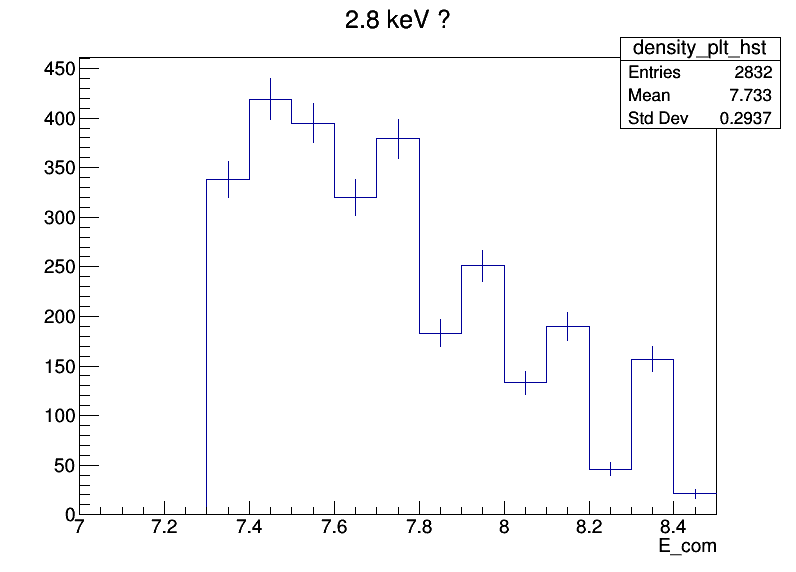

In [203]:
energy_cut=TCut('1/73*(s1area/{:g}+s2area/{:g})'.format(g1,g2)+'>29 &&1/73*(s1area/{:g}+s2area/{:g})'.format(g1,g2)+'<36' )

density_plt_hst=TH1F('density_plt_hst','2.8 keV ?;E_com',15,7,8.5)
n=chain2.Draw('luxstamp/10**15>>density_plt_hst',combined_cut + kr_time_cut_all + energy_cut) # WS is chain2,
density_plt_hst.SetOption("EH")

show(c2)

<h1> Add time cut to WS data. Low energy region </h1>

In [68]:
c1.Clear()

In [6]:
c1 = rootnotes.default_canvas(name='icanvas1', size=(800, 600))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


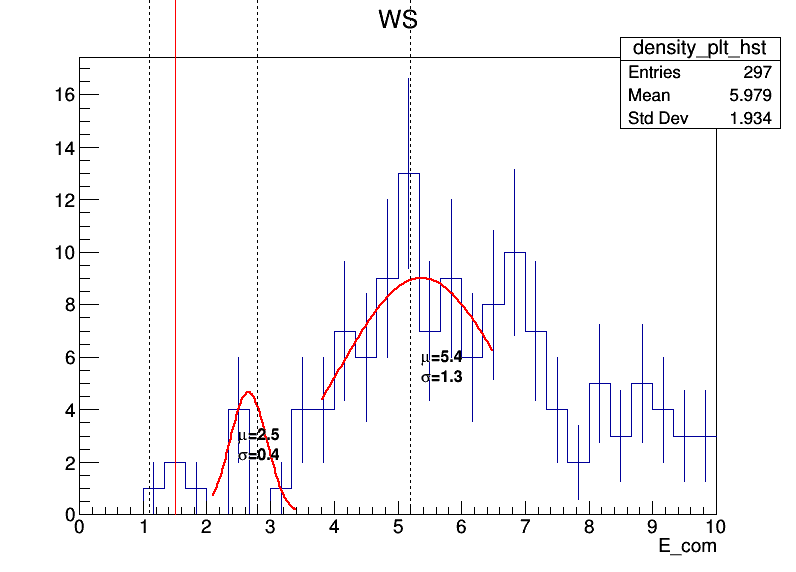

In [10]:
au = 3.2  #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.1158 
    
al = 2.5; # use 2.592 #90% 2.682
bl =-0.1197;

er_cut_l=TCut('log10(s2area/spikyS1)>{:g}*spikyS1^{:g}'.format(al,bl))
er_cut_u=TCut('log10(s2area/spikyS1)<{:g}*spikyS1^{:g}'.format(au,bu))

fid_vol=TCut('drift>35 && drift<308 && correctedRadius<25')
area_cut=TCut('spikyS1>0 && spikyS1<150  && s1area<150 && s2area_raw>150 && s2area>100 && s2area<10**5') #spikyS1
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
ercut= er_cut_l.GetTitle() + '&&' + er_cut_u.GetTitle()
#energy_cut=TCut('1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'<4 &&1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'>1.5' )
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() + '&&' + ercut);

density_plt_hst=TH1F('density_plt_hst','WS;E_com',30,0,10)
n=chain.Draw('1/73*(spikyS1/{:g}+s2area/{:g})>>density_plt_hst'.format(g1,g2),combined_cut) # WS is chain2 #  Cs is chain3
density_plt_hst.SetOption("EH")

aline=[]
Energies=[1.1,2.8,5.2] 

for ii, En in enumerate(Energies):
    aline.append(TLine(En,0,En,300))
    aline[ii].SetLineStyle(2)
    aline[ii].SetLineColor(1) #black =1
    aline[ii].Draw()

Thresh=TLine(1.5,0,1.5,360)#energy threshold
Thresh.SetLineColor(2)
Thresh.Draw()

amps=[]
means=[]
sigmas=[]
Texts=[]

density_plt_hst.Fit("gaus","","",1.8,3.4);
amps.append(density_plt_hst.GetFunction("gaus").GetParameter(0) )
means.append(density_plt_hst.GetFunction("gaus").GetParameter(1) )
sigmas.append(density_plt_hst.GetFunction("gaus").GetParameter(2) )

density_plt_hst.Fit("gaus","","",3.8,6.5);
amps.append(density_plt_hst.GetFunction("gaus").GetParameter(0) )
means.append(density_plt_hst.GetFunction("gaus").GetParameter(1) )
sigmas.append(density_plt_hst.GetFunction("gaus").GetParameter(2) )

amps=array(amps)
means=array(means)
sigmas=array(sigmas)

for ii, mu in enumerate(means):
    Texts.append(TLatex(mu,amps[ii]*0.6,'#splitline{{#mu={:1.2g}}}{{#sigma={:1.2g}}}'.format(means[ii],sigmas[ii]) ))
    Texts[ii].SetTextSize(0.03)
    Texts[ii].Draw()

    
density_plt_hst.Fit("gaus","","",2.1,3.4);
density_plt_hst.Fit("gaus","+","",3.8,6.5);

gStyle.SetOptFit(0) # superimpose fit results
show(c1)


<h1> Make a historgram of Cs data for the ~30 keV Xray energy region </h1>

In [54]:
c4 = rootnotes.default_canvas(name='icanvas2', size=(800, 600))

In [53]:
c4.Clear()

In [72]:
energy_cut.GetTitle()

'(1/73*(s1area/0.1167+s2area/12.05))<50 && (1/73*(s1area/0.1167+s2area/12.05))>0'

In [85]:
fid_vol=TCut('drift>35 && drift<305 && correctedRadius<25')
area_cut=TCut('s1area>0 && s1area<10**4 && s2area_raw>150 && s2area>100 && s2area<10**7') #spikyS1
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
energy_cut=TCut('(1/73*(s1area/{:g}+s2area/{:g})'.format(g1,g2)+')<10 && (1/73*(s1area/{:g}+s2area/{:g})'.format(g1,g2)+')>7' )
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle()+ '&&'  + energy_cut.GetTitle() ); # + '&&' + er_cut_lCs.GetTitle() + '&&' + er_cut_uCs.GetTitle()

density_plt_hst=TH1F('density_plt_hst','^{137}Cs;E_com',20,1500,4000) #20,0,40
#density_plt_hst.Fit("gaus");
n=chain3.Draw('s2area>>density_plt_hst',combined_cut) # WS is chain2 #  Cs is chain3
density_plt_hst.Fit("gaus");


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


In [47]:
aline=[]
Energies=[2.82, 8.05,(29.7+33.6)/2,54] 
for ii, En in enumerate(Energies):
    aline.append(TLine(En,0,En,140))
    aline[ii].SetLineStyle(2)
    aline[ii].SetLineColor(1) #black =1
    aline[ii].Draw()

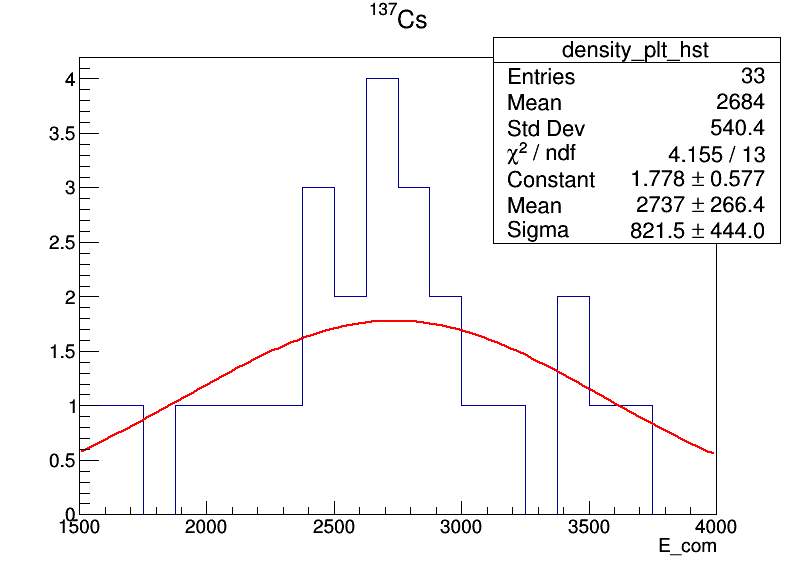

In [86]:
c4.SetLogy(0)
gStyle.SetOptFit(111) # superimpose fit results
show(c4)

<h1> Histogram the DD data </h1>

In [5]:
c5 = rootnotes.default_canvas(name='icanvas3', size=(800, 600))

In [119]:
fid_vol=TCut('drift>35 && drift<308 && correctedRadius<23')
area_cut=TCut('s1area>0 && s1area<10**6 && s2area_raw>150 && s2area>500 && s2area<10**7') #spikyS1
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
#energy_cut=TCut('1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'<4 &&1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'>1.5' )
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() );

density_plt_hst=TH1F('density_plt_hst','DD-2013;E_com',300,0,1000)
n=chain4.Draw('1/73*(s1area/{:g}+s2area/{:g})>>density_plt_hst'.format(g1DD,g2DD),combined_cut) # WS is chain2 #  Cs is chain3




TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


In [120]:
aline=[]
alineT=[]
Energies=[41.55,81,106,163.9,236.8,278, 312, 900,510] #Xe133 81 keV, no x-ray??, 500 keV is Xe137 ?? 911 Ac228
# Neutrino-U-238 to U-239. 27% 106 and 14% 278. 2.4 day halflife (need to check decay!!)
# Thorium -> 233 Pa, 312 keV
for ii, En in enumerate(Energies):
    aline.append(TLine(En,0,En,1e4))
    aline[ii].SetLineStyle(2)
    aline[ii].SetLineColor(1) #black =1
    aline[ii].Draw()
    
EnergiesT=[323,605,928] #Xe133 81 keV, no x-ray??, 500 keV is Xe137 ??
# Neutrino-U-238 to U-239. 27% 106 and 14% 278. 2.4 day halflife (need to check decay!!)
# Thorium -> 233 Pa, 312 keV
for ii, En in enumerate(EnergiesT):
    alineT.append(TLine(En,0,En,1e4))
    alineT[ii].SetLineStyle(2)
    alineT[ii].SetLineColor(2) #black =1
    alineT[ii].Draw()

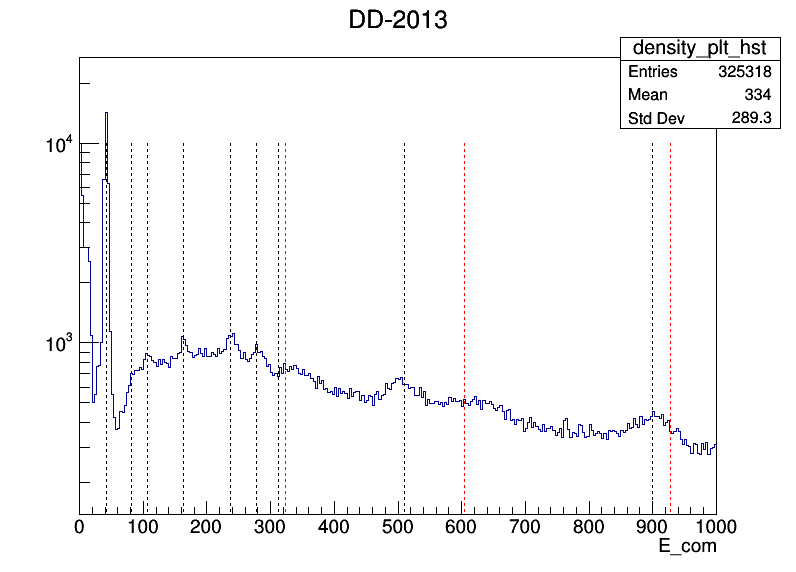

In [121]:
c5.SetLogy()
c5.SetLogx(0)
c5

<h1> Histogram 2.8 keV peak in Time </h1>

In [163]:
c4.Clear()

In [5]:
c4 = rootnotes.default_canvas(name='icanvas4', size=(800, 600))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


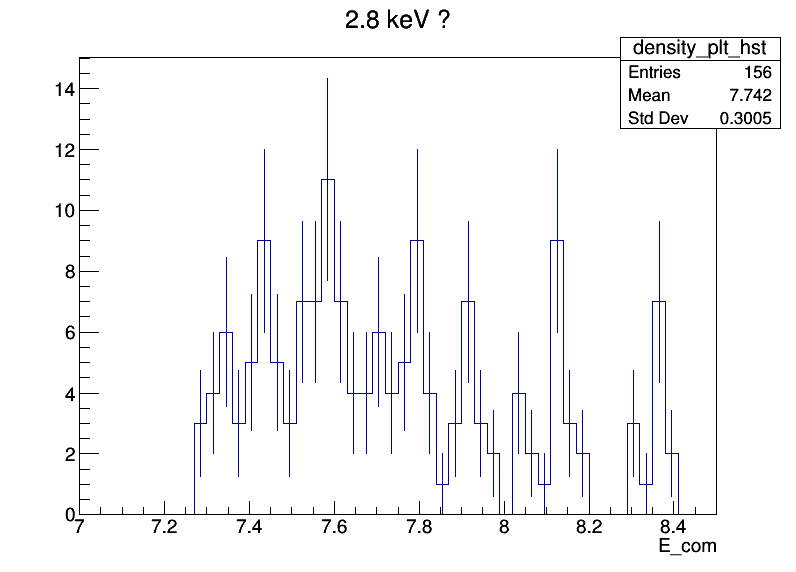

In [91]:
au = 3.007  #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.1158 
    
al = 2.682; # use 2.592 #90% 2.682
bl =-0.1197;

er_cut_l=TCut('log10(s2area/spikyS1)>{:g}*spikyS1^{:g}'.format(al,bl))
er_cut_u=TCut('log10(s2area/spikyS1)<{:g}*spikyS1^{:g}'.format(au,bu))
ercut= er_cut_l.GetTitle() + '&&' + er_cut_u.GetTitle()

fid_vol=TCut('drift>35 && drift<308 && correctedRadius<20')
area_cut=TCut('spikyS1>0 && spikyS1<150 && s1area<150 && s2area_raw>150 && s2area>200 && s2area<10**5')
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
energy_cut=TCut('1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'>4.3 &&1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'<6.3' )
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() + '&&' + energy_cut.GetTitle() + ' && ' + ercut );

density_plt_hst=TH1F('density_plt_hst','2.8 keV ?;E_com',50,7,8.5)
n=chain2.Draw('luxstamp/10**15>>density_plt_hst',combined_cut) # WS is chain2,
density_plt_hst.SetOption("EH")

c4

<h1> Calculate Livetime </h1>

In [225]:
time_diff=-1
kr_livetime_cut=ones(Run03Golden_lux_stamps.size,dtype=int)

for ii in range(0,Run03Golden_lux_stamps.size):
    for jj in range(0,Kr_lux_stamps.size):
        time_diff=Run03Golden_lux_stamps[ii] - Kr_lux_stamps[jj]
        if aLib.inrange(time_diff,[0,16*3600*10**8]):
            kr_livetime_cut[ii]=0

            

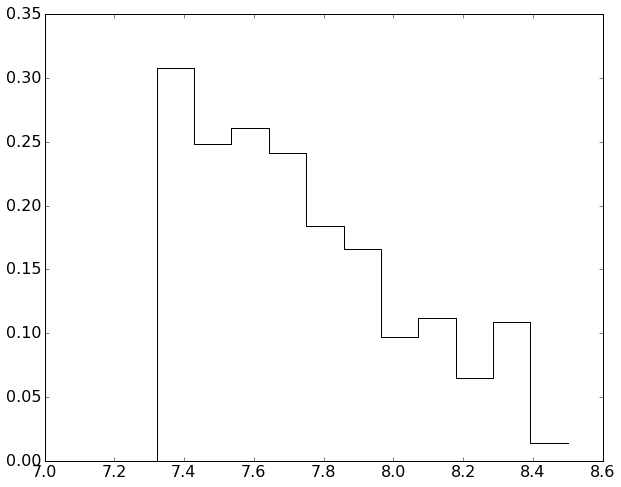

In [240]:
luxstamps = ndarray( (n,),dtype= float64, buffer=chain2.GetV1())
luxstamps_hist, xedges = histogram(luxstamps,linspace(7,8.5,15))
bin_center=(xedges[1:]+xedges[:-1])/2

livetime_in_bin=[]
for ii in range(0,luxstamps_hist.size):
    hist_cut=aLib.inrange(Run03Golden_lux_stamps/10**15,(xedges[ii],xedges[ii+1]))
    livetime_in_bin.append(Golden_Livetime[hist_cut&kr_livetime_cut].sum())

    
livetime_in_bin=array(livetime_in_bin)
plt.plot(xedges[1:],luxstamps_hist/livetime_in_bin,'k',drawstyle='steps')

In [227]:
luxstamps.max()
lux_epoch=datestr2num('Jan 1st 2011 at 00:00')
luxdatenum=luxstamps.max()*10**7/3600/24+lux_epoch
num2date(luxdatenum)

datetime.datetime(2013, 9, 1, 15, 2, 6, 443440, tzinfo=<matplotlib.dates._UTC object at 0x7f6f62836fd0>)

In [228]:
# convert luxstamp to date_num
lux_epoch=datestr2num('Jan 1st 2011 at 00:00')

luxstamp2day=bin_center*10**7/3600/24
luxstamp2day_edge=xedges[1:]*10**7/3600/24
luxdatenum=luxstamp2day+lux_epoch
luxdatenum_edge=luxstamp2day_edge+lux_epoch

In [229]:
from scipy.optimize import curve_fit
from __future__ import division

def func(x, a, c):
    return a*np.exp(-x/c)

In [230]:
# Neutron calibration dates
N_files=array([['lux10_20130412T1049'],
       ['lux10_20130415T0816'],
       ['lux10_20130424T0924'],
       ['lux10_20130523T1311'],
       ['lux10_20130523T1326'],
       ['lux10_20130523T1629'],
       ['lux10_20130628T0854'],
       ['lux10_20130703T0826'],
       ['lux10_20130703T1235'],
       ['lux10_20130710T0835'],
       ['lux10_20130710T1222'],
       ['lux10_20130710T1231'],
       ['lux10_20130724T0848'],
       ['lux10_20130724T1229'],
       ['lux10_20130730T1044'],
       ['lux10_20130730T1348'],
       ['lux10_20130731T0856'],
       ['lux10_20130731T1231'],
       ['lux10_20130812T0846'],
       ['lux10_20130812T1118'],
       ['lux10_20130812T1355'],
       ['lux10_20130827T0856'],
       ['lux10_20130827T1000'],
       ['lux10_20130827T1101'],
       ['lux10_20130827T1403'],
       ['lux10_20130827T1203'],
       ['lux10_20130827T1300']])

file_dates=[]
for ii in range(0,N_files.size):
    file_dates.append(parser.parse(N_files[ii,0][6:]))

file_dates=array(file_dates)


N_evts=array([31103, 24534, 115908, 16194, 527322, 353604, 234835, 532326, 445269,
       521869, 10268, 439175, 519518, 342309, 541436, 276833, 586072,
       507709, 531698, 550444, 17973, 225979, 216287, 223475, 203116,
       202831, 225329])

In [231]:
array([N_files[:,0], N_evts]).T

array([['lux10_20130412T1049', '31103'],
       ['lux10_20130415T0816', '24534'],
       ['lux10_20130424T0924', '115908'],
       ['lux10_20130523T1311', '16194'],
       ['lux10_20130523T1326', '527322'],
       ['lux10_20130523T1629', '353604'],
       ['lux10_20130628T0854', '234835'],
       ['lux10_20130703T0826', '532326'],
       ['lux10_20130703T1235', '445269'],
       ['lux10_20130710T0835', '521869'],
       ['lux10_20130710T1222', '10268'],
       ['lux10_20130710T1231', '439175'],
       ['lux10_20130724T0848', '519518'],
       ['lux10_20130724T1229', '342309'],
       ['lux10_20130730T1044', '541436'],
       ['lux10_20130730T1348', '276833'],
       ['lux10_20130731T0856', '586072'],
       ['lux10_20130731T1231', '507709'],
       ['lux10_20130812T0846', '531698'],
       ['lux10_20130812T1118', '550444'],
       ['lux10_20130812T1355', '17973'],
       ['lux10_20130827T0856', '225979'],
       ['lux10_20130827T1000', '216287'],
       ['lux10_20130827T1101', '223475'

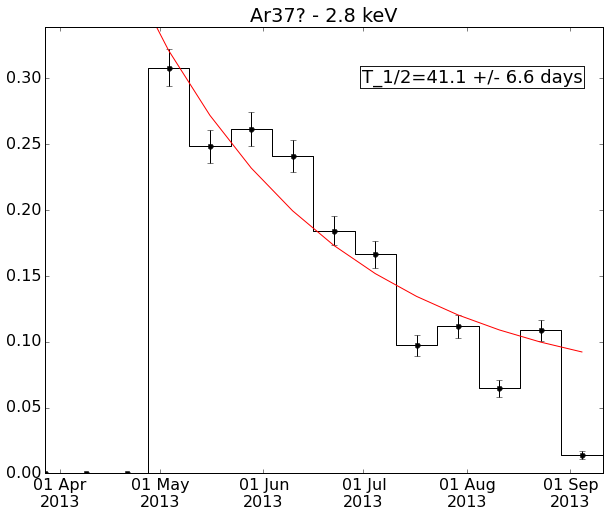

In [238]:
fit_start=datestr2num('May 1 2013 at 00:00')
fit_end=datestr2num('Sep 1 2013 at 00:00')
fit_offset=.06
fit_range=(luxdatenum>fit_start) & (luxdatenum<fit_end)

popt, pcov = curve_fit(func, (luxdatenum[fit_range]-luxdatenum[0]), (luxstamps_hist[fit_range]/livetime_in_bin[fit_range])-fit_offset,p0=(20,20),maxfev = 5000)

plt.plot_date(luxdatenum_edge,luxstamps_hist/livetime_in_bin,'k',drawstyle='steps')
plt.errorbar(luxdatenum,luxstamps_hist/livetime_in_bin,sqrt(luxstamps_hist)/livetime_in_bin,fmt=".k",markersize=10)
#plt.plot_date([file_dates,file_dates],[zeros(file_dates.size),70*ones(file_dates.size)],'--r')

plt.rcParams.update({'font.size': 16}) #increase all fontsizes
ax = gca()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d %b\n%Y'))
plt.ylabel('Counts/LUXSTAMP')

plt.plot(luxdatenum, func((luxdatenum-luxdatenum[0]), *popt)+fit_offset, 'r-', label="Fitted Curve")
plt.text(luxdatenum.max(),luxstamps_hist.max()/livetime_in_bin.max(),'T_1/2={:1.1f} +/- {:1.1f} days'.format(popt[1]*log(2),sqrt(pcov[1,1])*log(2)),
         horizontalalignment='right', verticalalignment='top', bbox=dict(facecolor='w', alpha=0.9),fontsize=18)
plt.ylim([0,luxstamps_hist.max()/livetime_in_bin.max()*1.1])
plt.title('Ar37? - 2.8 keV')

<h1> Histogram 5.2 keV peak in Time </h1>

In [153]:
c6 = rootnotes.default_canvas(name='icanvas6', size=(800, 600))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


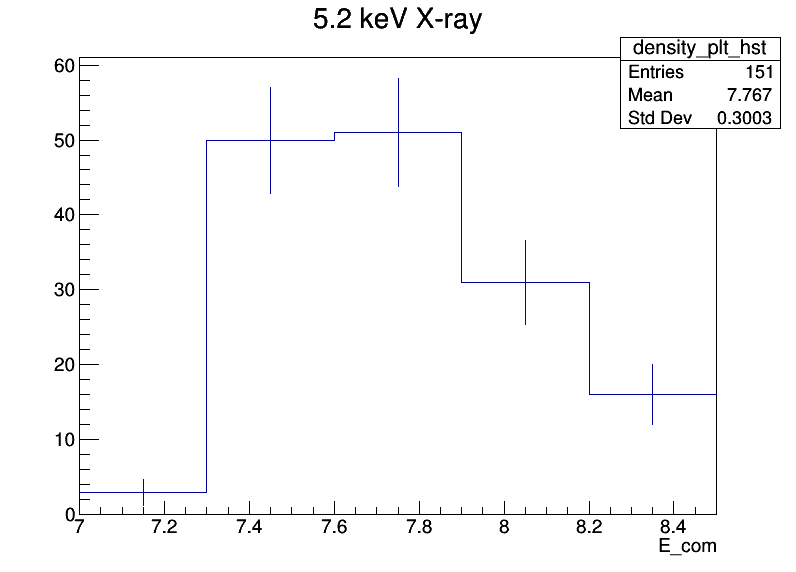

In [154]:
au = 3.2  #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.1158 
    
al = 2.5; # use 2.592 #90% 2.682
bl =-0.1197;

er_cut_l=TCut('log10(s2area/spikyS1)>{:g}*spikyS1^{:g}'.format(al,bl))
er_cut_u=TCut('log10(s2area/spikyS1)<{:g}*spikyS1^{:g}'.format(au,bu))
ercut= er_cut_l.GetTitle() + '&&' + er_cut_u.GetTitle()

fid_vol=TCut('drift>35 && drift<308 && correctedRadius<18')
area_cut=TCut('spikyS1>0 && spikyS1<150 && s1area<150 && s2area_raw>150 && s2area>200 && s2area<10**5')
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
energy_cut=TCut('1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'>4 &&1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'<7' )
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() + '&&' + energy_cut.GetTitle() + ' && ' + ercut );

density_plt_hst=TH1F('density_plt_hst','5.2 keV X-ray;E_com',5,7,8.5)
n=chain2.Draw('luxstamp/10**15>>density_plt_hst',combined_cut) # WS is chain2,
density_plt_hst.SetOption("EH")

c6

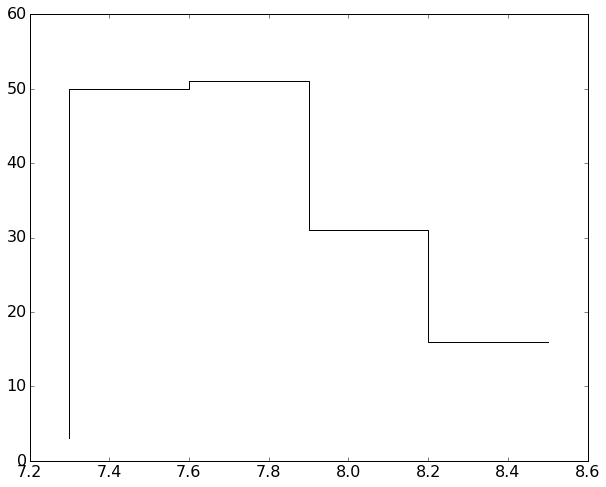

In [159]:
luxstamps = ndarray( (n,),dtype= float64, buffer=chain2.GetV1())
luxstamps_hist, xedges = histogram(luxstamps,linspace(7,8.5,6))
bin_center=(xedges[1:]+xedges[:-1])/2

plt.plot(xedges[1:],luxstamps_hist,'k',drawstyle='steps')

In [160]:
# convert luxstamp to date_num
lux_epoch=datestr2num('Jan 1st 2011 at 00:00')

luxstamp2day=bin_center*10**7/3600/24
luxstamp2day_edge=xedges[1:]*10**7/3600/24
luxdatenum=luxstamp2day+lux_epoch
luxdatenum_edge=luxstamp2day_edge+lux_epoch

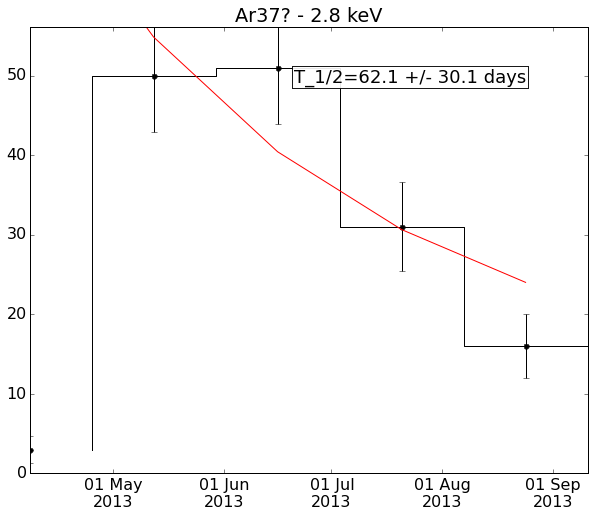

In [161]:
fit_start=datestr2num('May 1 2013 at 00:00')
fit_end=datestr2num('Sep 4 2013 at 00:00')
fit_offset=10
fit_range=(luxdatenum>fit_start) & (luxdatenum<fit_end)

popt, pcov = curve_fit(func, (luxdatenum[fit_range]-luxdatenum[0]), luxstamps_hist[fit_range]-fit_offset,p0=(20,20),maxfev = 5000)

plt.plot_date(luxdatenum_edge,luxstamps_hist,'k',drawstyle='steps')
plt.errorbar(luxdatenum,luxstamps_hist,sqrt(luxstamps_hist),fmt=".k",markersize=10)
#plt.plot_date([file_dates,file_dates],[zeros(file_dates.size),70*ones(file_dates.size)],'--r')

plt.rcParams.update({'font.size': 16}) #increase all fontsizes
ax = gca()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d %b\n%Y'))
plt.plot(luxdatenum, func((luxdatenum-luxdatenum[0]), *popt)+fit_offset, 'r-', label="Fitted Curve")
plt.text(luxdatenum.max(),luxstamps_hist.max(),'T_1/2={:1.1f} +/- {:1.1f} days'.format(popt[1]*log(2),sqrt(pcov[1,1])*log(2)),
         horizontalalignment='right', verticalalignment='top', bbox=dict(facecolor='w', alpha=0.9),fontsize=18)
plt.ylim([0,luxstamps_hist.max()*1.1])
plt.title('X-ray - 5.2 keV')


<h1> Plot discrimination band </h1>

In [73]:
c7.Clear()

In [74]:
c7 = rootnotes.default_canvas(name='icanvas7', size=(800, 600))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


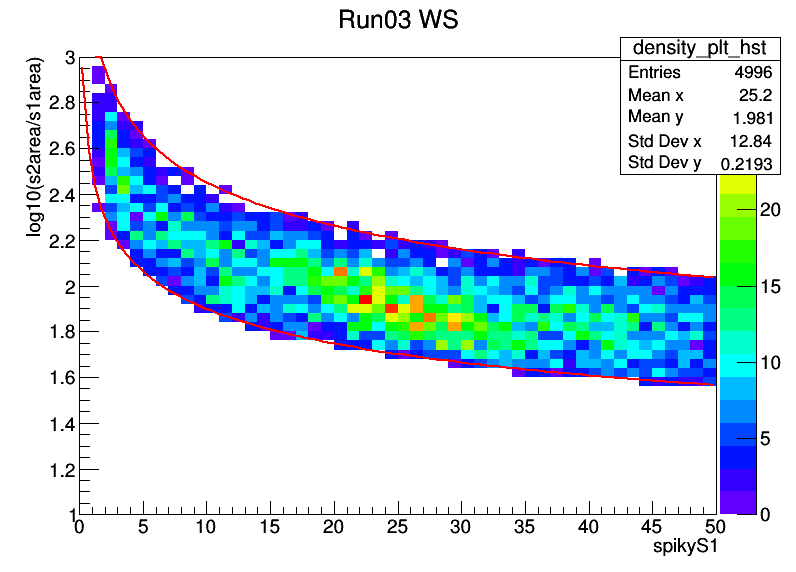

In [75]:
#95% ER bounds from tritium

au = 3.2  #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.1158 
    
al = 2.5; # use 2.592 #90% 2.682
bl =-0.1197;

er_cut_l=TCut('log10(s2area/spikyS1)>{:g}*spikyS1^{:g}'.format(al,bl))
er_cut_u=TCut('log10(s2area/spikyS1)<{:g}*spikyS1^{:g}'.format(au,bu))


fid_vol=TCut('drift>35 && drift<308 && correctedRadius<25')
area_cut=TCut('spikyS1>0 && s1area<50 && spikyS1<50 && s2area_raw>150 && s2area>100 && s2area<10**5')
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() + '&&' + er_cut_l.GetTitle() + '&&' + er_cut_u.GetTitle() );

density_plt_hst=TH2F('density_plt_hst','Run03 WS;spikyS1;log10(s2area/s1area)',50,0,50,50,1,3)

#chain2.SetMarkerStyle(6)
#chain2.SetMarkerSize(10)
n=chain2.Draw('log10(s2area/spikyS1):spikyS1>>density_plt_hst',combined_cut,'colz') # WS is chain2, chain3 is Cs137, 4 is DD



fun1 = TF1( 'fun1', '{:g}*x^{:g}'.format(al,bl), 0, 50)
fun2 = TF1( 'fun1', '{:g}*x^{:g}'.format(au,bu), 0, 50)
fun1.Draw('Same')
fun2.Draw('Same')


c7

<h1> Band for Cs137 </h1>

In [314]:
c8 = rootnotes.default_canvas(name='icanvas8', size=(800, 600))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


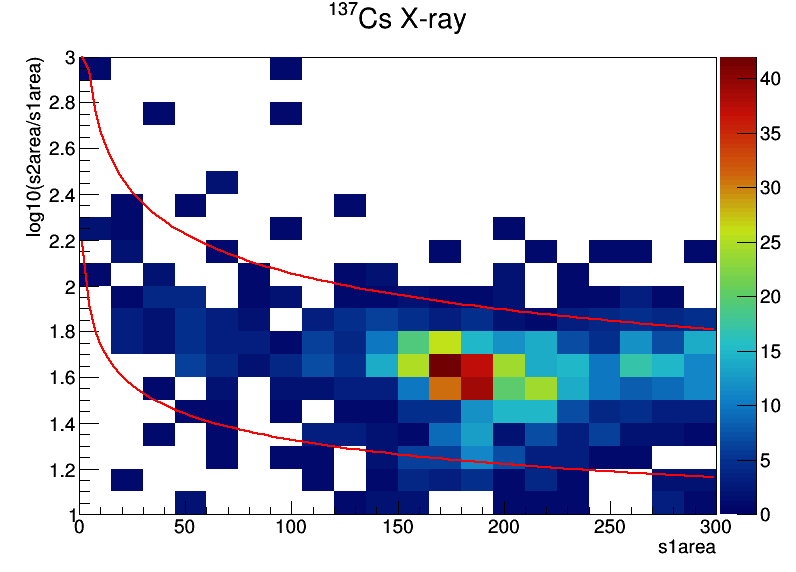

In [358]:
fid_vol=TCut('drift>35 && drift<308 && correctedRadius<25')
area_cut=TCut('s1area>0 && s1area<500 && s2area_raw>150 && s2area>100 && s2area<10**6')
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() );

density_plt_hst=TH2F('density_plt_hst','^{137}Cs X-ray;s1area;log10(s2area/s1area)',20,0,300,20,1,3)

chain3.SetMarkerStyle(6)
chain3.SetMarkerSize(10)
n=chain3.Draw('log10(s2area/s1area):s1area>>density_plt_hst',combined_cut,'colz') # WS is chain2, chain3 is Cs137, 4 is DD


#95% ER bounds from tritium

auCs = 3.5  #use 3.10 for 2 sigma bounds #90% 3.007
buCs = -0.1158 
    
alCs = 2.3; # use 2.592 #90% 2.682
blCs =-0.1197;

fun1 = TF1( 'fun1', '{:g}*x^{:g}'.format(alCs,blCs), 0, 300)
fun2 = TF1( 'fun1', '{:g}*x^{:g}'.format(auCs,buCs), 0, 300)
fun1.Draw('Same')
fun2.Draw('Same')

c8.SetLogz(0)
gStyle.SetOptStat(0)
gStyle.SetPalette(55)
gStyle.SetNumberContours(100)
c8

In [378]:
er_cut_lCs=TCut('log10(s2area/s1area)>{:g}*s1area^{:g}'.format(alCs,blCs))
er_cut_uCs=TCut('log10(s2area/s1area)<{:g}*s1area^{:g}'.format(auCs,buCs))

<h1> Band for DD data </h1>

In [452]:
c9 = rootnotes.default_canvas(name='icanvas9', size=(800, 600))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


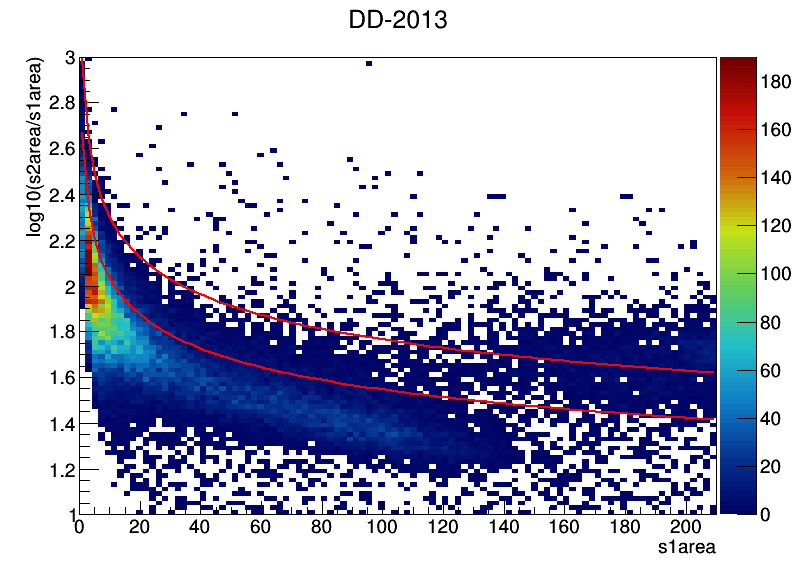

In [468]:
fid_vol=TCut('drift>35 && drift<308 && correctedRadius<25')
area_cut=TCut('s1area>0 && s1area<5000 && s2area_raw>150 && s2area>100 && s2area<10**6')
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() );

density_plt_hst=TH2F('density_plt_hst','DD-2013;s1area;log10(s2area/s1area)',100,0,210,100,1,3)

chain4.SetMarkerStyle(6)
chain4.SetMarkerSize(10)
n=chain4.Draw('log10(s2area/s1area):s1area>>density_plt_hst',combined_cut,'colz') # WS is chain2, chain3 is Cs137, 4 is DD


#95% ER bounds from tritium

auDD = 3.007  #use 3.10 for 2 sigma bounds #90% 3.007
buDD = -0.1158 
    
alDD = 2.682; # use 2.592 #90% 2.682
blDD =-0.1197;

fun1 = TF1( 'fun1', '{:g}*x^{:g}'.format(alDD,blDD), 0, 300)
fun2 = TF1( 'fun1', '{:g}*x^{:g}'.format(auDD,buDD), 0, 300)
fun1.Draw('Same')
fun2.Draw('Same')

c8.SetLogz()
gStyle.SetOptStat(0)
gStyle.SetPalette(55)
gStyle.SetNumberContours(100)
show(c9)

In [ ]:
clearCanvas()